In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("credit_scoring.csv")
df = pd.DataFrame(data)


In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0]) 
    else:
        df[column] = df[column].fillna(df[column].mean())  



In [8]:
label_encoder = LabelEncoder()
categorical_columns = ["Gender", "Marital Status", "Education Level", "Employment Status", "Type of Loan"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


scaler = StandardScaler()
numerical_columns = df.drop("Credit Utilization Ratio", axis=1).select_dtypes(include=np.number).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [10]:
X = df.drop("Credit Utilization Ratio", axis=1)
y = df["Credit Utilization Ratio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [14]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

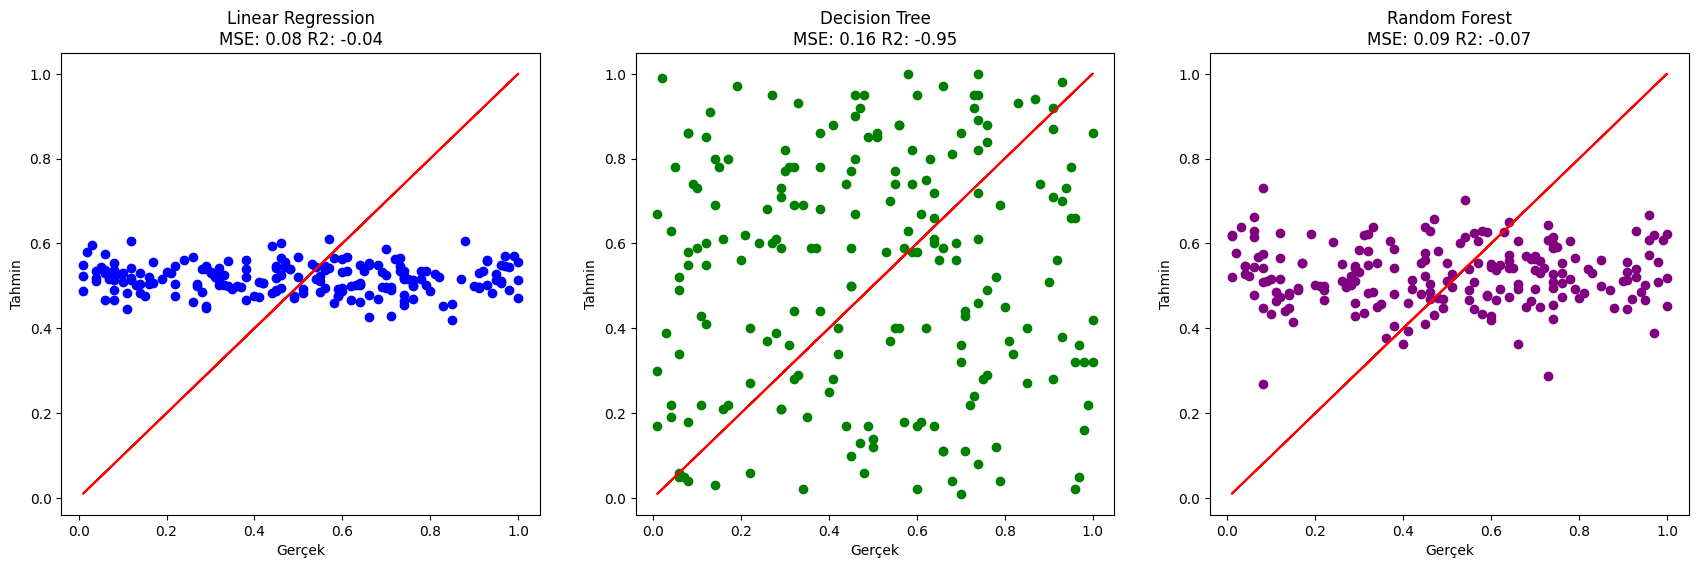

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

axes[0].scatter(y_test, lr_y_pred, color='blue')
axes[0].plot(y_test, y_test, color='red')  
axes[0].set_title(f'Linear Regression\nMSE: {lr_mse:.2f} R2: {lr_r2:.2f}')
axes[0].set_xlabel('Gerçek')
axes[0].set_ylabel('Tahmin')

axes[1].scatter(y_test, dt_y_pred, color='green')
axes[1].plot(y_test, y_test, color='red')  
axes[1].set_title(f'Decision Tree\nMSE: {dt_mse:.2f} R2: {dt_r2:.2f}')
axes[1].set_xlabel('Gerçek')
axes[1].set_ylabel('Tahmin')

axes[2].scatter(y_test, rf_y_pred, color='purple')
axes[2].plot(y_test, y_test, color='red') 
axes[2].set_title(f'Random Forest\nMSE: {rf_mse:.2f} R2: {rf_r2:.2f}')
axes[2].set_xlabel('Gerçek')
axes[2].set_ylabel('Tahmin')

plt.show()
